## Análise CAGED - Parte 2 (R)

Os valores encontrados na Parte 1, calcular a variação percentual mensal entre cada nr_comp_movim e identificar qual a maior variação percentual e em qual mês ocorreu.

In [8]:

if (!require(readxl)) install.packages("readxl")
if (!require(dplyr)) install.packages("dplyr")
if (!require(ggplot2)) install.packages("ggplot2")

library(readxl)
library(dplyr)
library(ggplot2)

## Aqui usei uma extenção e carreguei separadamente, mas a analise tbm poderia ser feita no mesmo notebook da parte 1.

- Continuação da Parte 1 - carregar resultados anteriores
- No final do cod da parte 1, pedi para extrair o arquivo que vai ser usado aqui
- resultado_parte1 <- read.csv("resultado_parte1.csv")

[1] "=== PARTE 2 - VARIAÇÃO PERCENTUAL ==="
[1] "Variação Percentual Mensal:"
  nr_comp_movim competencia_formatada valor_medio valor_anterior
1        202401               2024/01    5198.962             NA
2        202402               2024/02    5195.715       5198.962
3        202403               2024/03    4995.917       5195.715
4        202404               2024/04    5257.025       4995.917
5        202405               2024/05    5310.047       5257.025
6        202406               2024/06    5505.838       5310.047
  variacao_absoluta variacao_percentual
1                NA                  NA
2         -3.246251         -0.06244038
3       -199.798813         -3.84545332
4        261.108813          5.22644453
5         53.021053          1.00857515
6        195.791768          3.68719497
[1] "\n=== MAIOR VARIAÇÃO PERCENTUAL ==="
[1] "Competência: 2024/04"
[1] "Mês (nr_comp_movim): 202404"
[1] "Variação Percentual: 5.23 %"
[1] "Valor Atual: R$ 5257.03"
[1] "Valor Anterior:

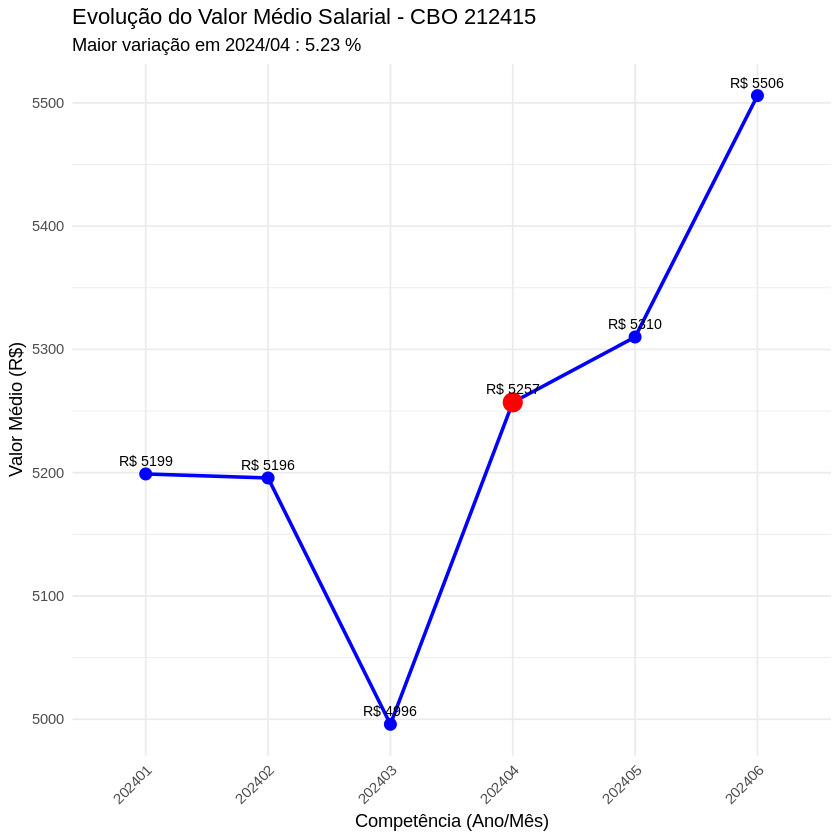

[1] "\n=== RESUMO PARTE 2 ==="
[1] "Total de competências analisadas: 6"
[1] "Competências com variação calculada: 5"
[1] "Competência com maior variação: 2024/04"
[1] "Maior variação percentual: 5.23 %"
[1] "Variável para Parte 3 (Python): mes_maior_variacao = 202404"


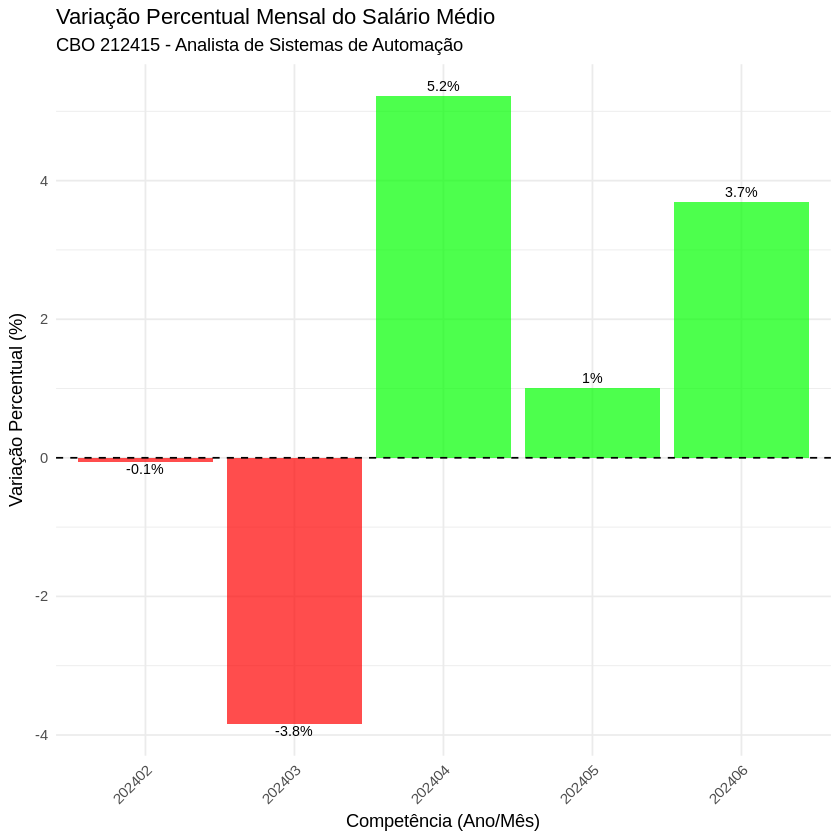

In [9]:
if (!exists("resultado_parte1")) {
  resultado_parte1 <- read.csv("resultado_parte1.csv")
}


print("=== PARTE 2 - VARIAÇÃO PERCENTUAL ===")


resultado_parte1 <- resultado_parte1 %>% arrange(nr_comp_movim)

# variação percentual em relação ao mês anterior
resultado_parte2 <- resultado_parte1 %>%
  mutate(
    # mês anterior
    valor_anterior = lag(valor_medio, 1),

    # variação absoluta
    variacao_absoluta = valor_medio - valor_anterior,

    # variação percentual: ((valor_atual - valor_anterior) / valor_anterior) * 100
    variacao_percentual = ifelse(
      !is.na(valor_anterior) & valor_anterior != 0,
      ((valor_medio - valor_anterior) / valor_anterior) * 100,
      NA
    ),

    # para melhor visualização
    competencia_formatada = paste0(
      substr(as.character(nr_comp_movim), 1, 4), "/",
      substr(as.character(nr_comp_movim), 5, 6)
    )
  )


print("Variação Percentual Mensal:")
print(resultado_parte2 %>%
  select(nr_comp_movim, competencia_formatada, valor_medio, valor_anterior,
         variacao_absoluta, variacao_percentual))



resultado_parte2$variacao_abs = abs(resultado_parte2$variacao_percentual)

# variação
maior_variacao <- resultado_parte2 %>%
  filter(!is.na(variacao_percentual)) %>%
  arrange(desc(variacao_abs)) %>%
  slice(1)

print("\n=== MAIOR VARIAÇÃO PERCENTUAL ===")
print(paste("Competência:", maior_variacao$competencia_formatada))
print(paste("Mês (nr_comp_movim):", maior_variacao$nr_comp_movim))
print(paste("Variação Percentual:", round(maior_variacao$variacao_percentual, 2), "%"))
print(paste("Valor Atual:", paste0("R$ ", round(maior_variacao$valor_medio, 2))))
print(paste("Valor Anterior:", paste0("R$ ", round(maior_variacao$valor_anterior, 2))))
print(paste("Variação Absoluta:", paste0("R$ ", round(maior_variacao$variacao_absoluta, 2))))

# gráfico da evolução com destaque na maior variação
ggplot(resultado_parte2, aes(x = factor(nr_comp_movim), y = valor_medio)) +
  geom_line(aes(group = 1), color = "blue", size = 1) +
  geom_point(color = "blue", size = 3) +
  geom_point(data = maior_variacao, aes(x = factor(nr_comp_movim), y = valor_medio),
             color = "red", size = 5) +
  geom_text(aes(label = paste0("R$ ", round(valor_medio, 0))),
            vjust = -0.8, size = 3) +
  labs(
    title = "Evolução do Valor Médio Salarial - CBO 212415",
    subtitle = paste("Maior variação em", maior_variacao$competencia_formatada,
                    ":", round(maior_variacao$variacao_percentual, 2), "%"),
    x = "Competência (Ano/Mês)",
    y = "Valor Médio (R$)"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# gráfico específico da variação percentual
ggplot(resultado_parte2 %>% filter(!is.na(variacao_percentual)),
       aes(x = factor(nr_comp_movim), y = variacao_percentual)) +
  geom_bar(stat = "identity",
           fill = ifelse(resultado_parte2$variacao_percentual[!is.na(resultado_parte2$variacao_percentual)] >= 0,
                        "green", "red"),
           alpha = 0.7) +
  geom_text(aes(label = paste0(round(variacao_percentual, 1), "%")),
            vjust = ifelse(resultado_parte2$variacao_percentual[!is.na(resultado_parte2$variacao_percentual)] >= 0,
                          -0.5, 1.2),
            size = 3) +
  labs(
    title = "Variação Percentual Mensal do Salário Médio",
    subtitle = "CBO 212415 - Analista de Sistemas de Automação",
    x = "Competência (Ano/Mês)",
    y = "Variação Percentual (%)"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black")

# resultados para uso na Parte 3 (Python)
write.csv(resultado_parte2, "resultado_parte2.csv", row.names = FALSE)

# salvar especificamente a competência com maior variação
write.csv(data.frame(
  competencia_maior_variacao = maior_variacao$nr_comp_movim,
  variacao_percentual = maior_variacao$variacao_percentual
), "maior_variacao.csv", row.names = FALSE)

print("\n=== RESUMO PARTE 2 ===")
print(paste("Total de competências analisadas:", nrow(resultado_parte2)))
print(paste("Competências com variação calculada:", sum(!is.na(resultado_parte2$variacao_percentual))))
print(paste("Competência com maior variação:", maior_variacao$competencia_formatada))
print(paste("Maior variação percentual:", round(maior_variacao$variacao_percentual, 2), "%"))


mes_maior_variacao <- maior_variacao$nr_comp_movim
print(paste("Variável para Parte 3 (Python): mes_maior_variacao =", mes_maior_variacao))
